In [7]:
from database_connection import connect_to_db, close_db_connection
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
def fetch_revenue_by_region_with_date_filter(conn, start_date=None, end_date=None):
    """
    Fetch revenue by region from the database with optional date filtering.

    Args:
        conn: The database connection object.
        start_date (str): The start date for filtering (e.g., "2023-01-01").
        end_date (str): The end date for filtering (e.g., "2023-03-31").

    Returns:
        pd.DataFrame: A Pandas DataFrame with revenue by region.
    """
    # Base SQL query
    query = """
        SELECT
            l.country,
            SUM(so.units_sold * so.unit_price) AS revenue
        FROM
            fact_sales_order so
        JOIN
            dim_location l
        ON
            so.agreed_delivery_location_id = l.location_id
    """

    # Add date filtering if start_date and end_date are provided
    if start_date and end_date:
        query += f"""
        WHERE
            so.created_date >= '{start_date}'
            AND so.created_date <= '{end_date}'
        """
    
    # Add grouping and ordering
    query += """
        GROUP BY
            l.country
        ORDER BY
            revenue DESC;
    """
    
    # Execute the query and fetch the results
    cursor = conn.cursor()
    cursor.execute(query)
    columns = [desc[0] for desc in cursor.description]
    rows = cursor.fetchall()
    cursor.close()
    
    # Convert the result into a Pandas DataFrame
    df = pd.DataFrame(rows, columns=columns)
    return df

In [9]:
def plot_revenue_by_region_pie(revenue_data):
    """
    Plot revenue by region as a pie chart.
    """
    plt.figure(figsize=(12, 8))
    plt.pie(
        revenue_data["revenue"], 
        labels=revenue_data["country"], 
        autopct="%1.1f%%", 
        startangle=140,
        colors=plt.cm.tab20.colors
    )
    plt.title("Revenue Distribution by Region in Q1 2023")
    plt.tight_layout()
    plt.savefig("sales_by_region.png")
    plt.show()
    plt.close()

In [10]:
# Establish database connection
conn = connect_to_db()

# Define the date range
start_date = "2023-01-01"
end_date = "2023-03-31"

# Fetch revenue by region
revenue_data = fetch_revenue_by_region_with_date_filter(conn, start_date, end_date)

# Close the connection
conn.close()

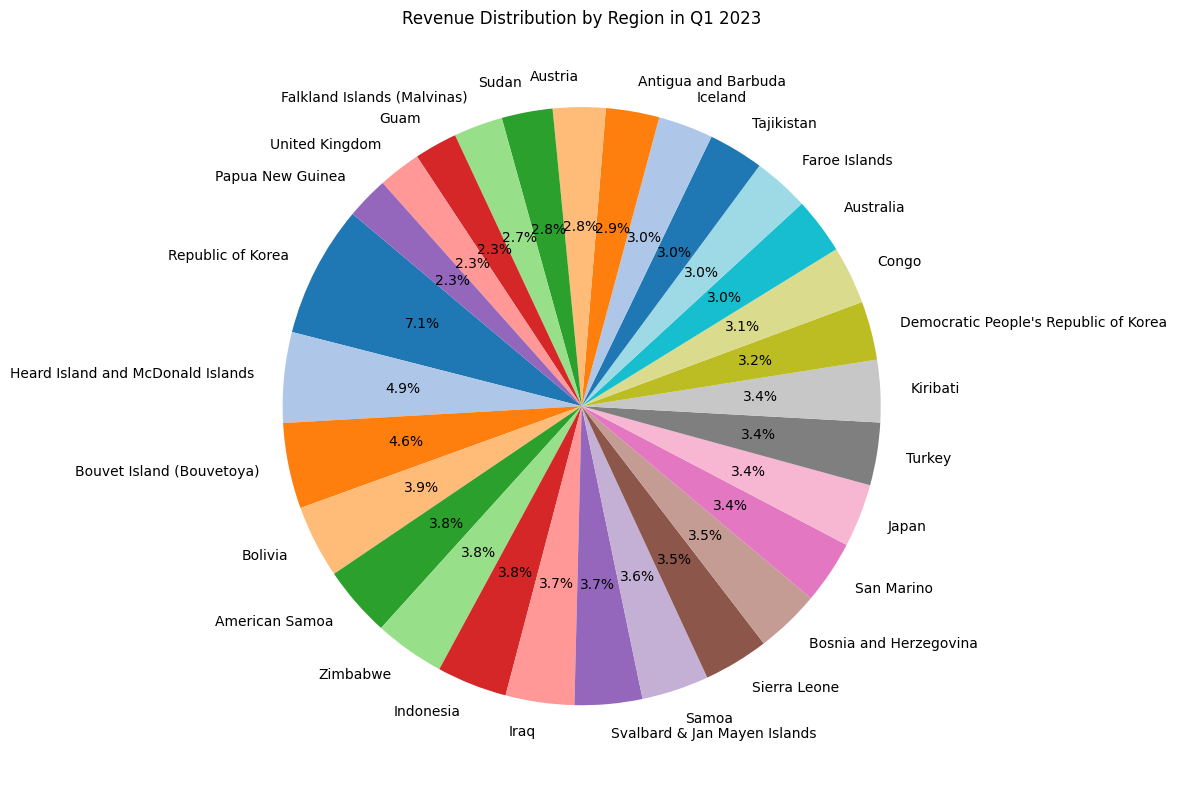

In [11]:
# call the method to visualise
plot_revenue_by_region_pie(revenue_data=revenue_data)

## The above pie chart shows the revenue generated in different countries, from 1st Jan to 31st March 2023. As we can notice, 'Repulic of Korea' has generated the highest revenue of 7.1%; while the lowest is from 'Papua New Guinea'. The average revenue from most of the countries comes out to be near 3%.